In [1]:
%matplotlib inline 
import seaborn as sns
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import gmplot
import matplotlib.pyplot as plt
df = pd.read_csv("datasets/2017_2018_descriptive_set_initial_processed.csv")

In [2]:
df

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_CODE,SOC_NAME,...,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,wage_diff,regions
0,CERTIFIED,2015-10-06,2017-10-01,H-1B,2015-11-15,2017-11-14,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,15-2041,STATISTICIANS,...,0,0,Y,58032.00,58032.00,N,N,MA,0.00,northeast
1,CERTIFIED,2016-05-13,2017-10-01,H-1B,2016-09-01,2019-08-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),ASSISTANT PROFESSOR,25-1031,"ARCHITECTURE TEACHERS, POSTSECONDARY",...,0,0,Y,60967.00,95600.00,N,N,MA,34633.00,northeast
2,CERTIFIED,2016-11-04,2017-10-01,H-1B,2016-12-01,2017-11-30,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,19-2012,PHYSICISTS,...,0,0,Y,50398.00,60400.00,N,N,MA,10002.00,northeast
3,CERTIFIED,2016-12-28,2017-10-01,H-1B,2017-02-01,2018-01-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,RESEARCH SCIENTIST,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",...,0,0,Y,61069.00,65000.00,N,N,MA,3931.00,northeast
4,CERTIFIED,2017-02-24,2017-10-01,H-1B,2017-06-01,2018-05-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,17-2131,MATERIALS ENGINEERS,...,0,0,Y,41392.00,49383.00,N,N,MA,7991.00,northeast
5,CERTIFIED,2017-03-09,2017-10-01,H-1B,2017-09-08,2020-09-08,"PARK VIEW TRAVEL BEVERLY HILLS, LLC",EVENTS AND INCENTIVES COORDINATOR,13-1121,"MEETING, CONVENTION, AND EVENT PLANNERS",...,0,0,Y,45198.00,45200.00,N,N,CA,2.00,west
6,CERTIFIED,2014-10-23,2017-10-02,H-1B,2014-11-01,2017-10-31,"WALTER ASSOCIATES, INCORPORATED",ASSOCIATE,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",...,1,0,Y,78624.00,88381.32,N,N,MI,9757.32,midwest
7,CERTIFIED,2015-01-07,2017-10-02,H-1B,2015-02-01,2018-01-31,COLUMBIA UNIVERSITY,ASSOCIATE RESEARCH SCIENTIST,19-1029,"BIOLOGICAL SCIENTISTS, ALL OTHER",...,0,0,Y,47247.20,53000.00,N,N,NY,5752.80,northeast
8,CERTIFIED,2015-05-08,2017-10-02,H-1B,2015-10-01,2018-09-30,"CREST ELECTRONICS, INC.",ELECTRICAL DESIGN ENGINEER,17-2071,ELECTRICAL ENGINEERS,...,0,0,Y,60133.00,61347.00,N,N,MN,1214.00,midwest
9,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-10,2020-10-09,"HORIZONSOFTSOLUTIONS, INC",SOFTWARE DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",...,0,0,Y,98176.00,104000.00,Y,N,IL,5824.00,midwest


In [3]:
len(df["EMPLOYER_NAME"].unique())

96130

In [4]:
df["EMPLOYER_NAME"].value_counts()

INFOSYS LIMITED                                    29799
TATA CONSULTANCY SERVICES LIMITED                  25988
DELOITTE CONSULTING LLP                            20129
CAPGEMINI AMERICA INC                              14440
TECH MAHINDRA (AMERICAS),INC.                      12932
ACCENTURE LLP                                      11670
ERNST & YOUNG U.S. LLP                             11196
WIPRO LIMITED                                      10507
IBM INDIA PRIVATE LIMITED                           9192
MICROSOFT CORPORATION                               9002
HCL AMERICA, INC.                                   6215
IBM CORPORATION                                     5991
COGNIZANT TECHNOLOGY SOLUTIONS US CORP              5310
GOOGLE INC.                                         5073
GOOGLE LLC                                          5032
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     4472
LARSEN & TOUBRO INFOTECH LIMITED                    4322
SYNTEL CONSULTING INC.         

In [5]:
top_20 = df["EMPLOYER_NAME"].value_counts()[:20]

In [6]:
top_20_sum = sum(top_20.values)

In [7]:
top_20_sum

203365

In [8]:
num_of_applications = len(df["EMPLOYER_NAME"])
print(num_of_applications)

1101210


In [9]:
top_20_percent = round((top_20_sum / num_of_applications)* 100,2)
print(top_20_percent)

18.47


out of the roughly 96130 compaines(admin errors in the company names means its not 100% accuarate) who submitted applications the top 20 companies submitted 18.5 percent of the total applications

In [10]:
top_20_keys = top_20.keys().tolist()

In [11]:
def count_success_for_each(keys, df):
    for key in keys:
        df_test = df[df["EMPLOYER_NAME"] == key]
        series_count = df_test["CASE_STATUS"].value_counts()
        result = (series_count.values[1] / series_count.values[0])* 100
        print("key: " + key + "\n")
        print(series_count)
        print("\n")
        print("percentage denied: " + str(result) + "\n")

In [12]:
count_success_for_each(top_20_keys, df)

key: INFOSYS LIMITED

CERTIFIED    29797
DENIED           2
Name: CASE_STATUS, dtype: int64


percentage denied: 0.006712085109239186

key: TATA CONSULTANCY SERVICES LIMITED

CERTIFIED    25946
DENIED          42
Name: CASE_STATUS, dtype: int64


percentage denied: 0.16187466276111925

key: DELOITTE CONSULTING LLP

CERTIFIED    19859
DENIED         270
Name: CASE_STATUS, dtype: int64


percentage denied: 1.359585074777179

key: CAPGEMINI AMERICA INC

CERTIFIED    14395
DENIED          45
Name: CASE_STATUS, dtype: int64


percentage denied: 0.3126085446335533

key: TECH MAHINDRA (AMERICAS),INC.

CERTIFIED    12920
DENIED          12
Name: CASE_STATUS, dtype: int64


percentage denied: 0.09287925696594426

key: ACCENTURE LLP

CERTIFIED    11659
DENIED          11
Name: CASE_STATUS, dtype: int64


percentage denied: 0.09434771421219658

key: ERNST & YOUNG U.S. LLP

CERTIFIED    11065
DENIED         131
Name: CASE_STATUS, dtype: int64


percentage denied: 1.183913239945775

key: WIPRO LIMI

In [13]:
series_count = df["CASE_STATUS"].value_counts()
print((series_count.values[1] / series_count.values[0])* 100)

1.2486794669873644


In [14]:
text = ""
for key in df["EMPLOYER_NAME"]:
    text += key + " , "

In [15]:
#text = ""
#for key in top_20_keys:
#    text += key + " " 
text = text.replace(".", "")
text = text.replace("INC","")
text = text.replace("LLC", "")
text = text.replace("LLP", "")
text = text.replace("LIMITED", "")

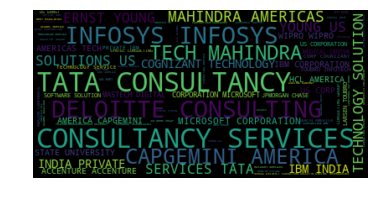

In [16]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

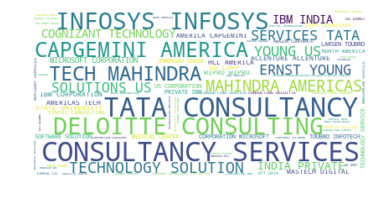

In [17]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

while this data is interesting its not particualrly useful for prediction on its own, we are going to create an employer success rate and 

In [18]:
employer_count = df["EMPLOYER_NAME"].value_counts()

In [19]:
employer_count["DELOITTE CONSULTING LLP"]

20129

In [20]:
def create_applications_employer(row, employer_count):
    return employer_count[row["EMPLOYER_NAME"]]

In [21]:
df["applications_per_employer"] = df.apply(lambda row: create_applications_employer(row, employer_count),
                                           axis=1)

In [22]:
df_test = df[df["EMPLOYER_NAME"] == "DELOITTE CONSULTING LLP"]

In [23]:
df_test

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_CODE,SOC_NAME,...,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,wage_diff,regions,applications_per_employer
436,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-02,2020-10-01,DELOITTE CONSULTING LLP,SENIOR SOLUTIONS SPECIALIST,15-1121,COMPUTER SYSTEMS ANALYSTS,...,3,Y,68598.0,71614.0,N,N,PA,3016.0,northeast,20129
475,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-02,2020-10-01,DELOITTE CONSULTING LLP,SOLUTION MANAGER,15-1121,COMPUTER SYSTEMS ANALYSTS,...,3,Y,70928.0,96000.0,N,N,MI,25072.0,midwest,20129
544,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-02,2020-10-01,DELOITTE CONSULTING LLP,SENIOR CONSULTANT,15-2031,OPERATIONS RESEARCH ANALYSTS,...,0,Y,78478.0,93000.0,N,N,PA,14522.0,northeast,20129
548,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-01,2020-09-30,DELOITTE CONSULTING LLP,CONSULTANT,13-1111,MANAGEMENT ANALYSTS,...,3,Y,55411.0,73819.0,N,N,NY,18408.0,northeast,20129
549,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-01,2020-09-30,DELOITTE CONSULTING LLP,MANAGER,11-3021,COMPUTER AND INFORMATION SYSTEMS MANAGERS,...,3,Y,81952.0,98000.0,N,N,AR,16048.0,south,20129
554,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-11-01,2020-10-31,DELOITTE CONSULTING LLP,MANAGER,15-2031,OPERATIONS RESEARCH ANALYSTS,...,0,Y,94224.0,111051.0,N,N,PA,16827.0,northeast,20129
592,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-03,2020-10-02,DELOITTE CONSULTING LLP,SENIOR CONSULTANT,15-2031,OPERATIONS RESEARCH ANALYSTS,...,3,Y,51314.0,83000.0,N,N,FL,31686.0,south,20129
654,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-09-27,2020-09-26,DELOITTE CONSULTING LLP,CONSULTANT,15-1121,COMPUTER SYSTEMS ANALYSTS,...,0,Y,65042.0,70000.0,N,N,CA,4958.0,west,20129
655,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-09-27,2020-09-26,DELOITTE CONSULTING LLP,MANAGER,11-3021,COMPUTER AND INFORMATION SYSTEMS MANAGERS,...,0,Y,106288.0,106288.0,N,N,TX,0.0,south,20129
791,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-09-27,2020-09-26,DELOITTE CONSULTING LLP,SPECIALIST SENIOR,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",...,0,Y,100194.0,100194.0,N,N,VA,0.0,south,20129


applications per employer is set now for employer success rate

In [24]:
employer_unique = df["EMPLOYER_NAME"].unique()
success_count = {}
for x in employer_unique:
    success_count[x] = 0

In [25]:
def populate_success(row):
    if row["CASE_STATUS"] == "CERTIFIED":
        success_count[row["EMPLOYER_NAME"]] += 1

In [26]:
df.apply(lambda row: populate_success(row), axis=1)

0          None
1          None
2          None
3          None
4          None
5          None
6          None
7          None
8          None
9          None
10         None
11         None
12         None
13         None
14         None
15         None
16         None
17         None
18         None
19         None
20         None
21         None
22         None
23         None
24         None
25         None
26         None
27         None
28         None
29         None
           ... 
1101180    None
1101181    None
1101182    None
1101183    None
1101184    None
1101185    None
1101186    None
1101187    None
1101188    None
1101189    None
1101190    None
1101191    None
1101192    None
1101193    None
1101194    None
1101195    None
1101196    None
1101197    None
1101198    None
1101199    None
1101200    None
1101201    None
1101202    None
1101203    None
1101204    None
1101205    None
1101206    None
1101207    None
1101208    None
1101209    None
Length: 1101210, dtype: 

In [27]:
success_count["DELOITTE CONSULTING LLP"]

19859

In [28]:
df_test = df[df["EMPLOYER_NAME"] == "DELOITTE CONSULTING LLP"]
df_test["CASE_STATUS"].value_counts()

CERTIFIED    19859
DENIED         270
Name: CASE_STATUS, dtype: int64

In [29]:
print(round((19859 / 20129) * 100, 1))

98.7


In [30]:
def create_success_rate(row, employer_count, success_count):
    return round((success_count[row["EMPLOYER_NAME"]] / employer_count[row["EMPLOYER_NAME"]]) * 100, 1)

In [31]:
df["employer_success_rate"] = df.apply(lambda row: create_success_rate(row, employer_count,
                                                                       success_count), axis=1)

In [32]:
df

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_CODE,SOC_NAME,...,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,wage_diff,regions,applications_per_employer,employer_success_rate
0,CERTIFIED,2015-10-06,2017-10-01,H-1B,2015-11-15,2017-11-14,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,15-2041,STATISTICIANS,...,Y,58032.00,58032.00,N,N,MA,0.00,northeast,362,98.6
1,CERTIFIED,2016-05-13,2017-10-01,H-1B,2016-09-01,2019-08-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),ASSISTANT PROFESSOR,25-1031,"ARCHITECTURE TEACHERS, POSTSECONDARY",...,Y,60967.00,95600.00,N,N,MA,34633.00,northeast,50,96.0
2,CERTIFIED,2016-11-04,2017-10-01,H-1B,2016-12-01,2017-11-30,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,19-2012,PHYSICISTS,...,Y,50398.00,60400.00,N,N,MA,10002.00,northeast,362,98.6
3,CERTIFIED,2016-12-28,2017-10-01,H-1B,2017-02-01,2018-01-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,RESEARCH SCIENTIST,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",...,Y,61069.00,65000.00,N,N,MA,3931.00,northeast,362,98.6
4,CERTIFIED,2017-02-24,2017-10-01,H-1B,2017-06-01,2018-05-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,17-2131,MATERIALS ENGINEERS,...,Y,41392.00,49383.00,N,N,MA,7991.00,northeast,362,98.6
5,CERTIFIED,2017-03-09,2017-10-01,H-1B,2017-09-08,2020-09-08,"PARK VIEW TRAVEL BEVERLY HILLS, LLC",EVENTS AND INCENTIVES COORDINATOR,13-1121,"MEETING, CONVENTION, AND EVENT PLANNERS",...,Y,45198.00,45200.00,N,N,CA,2.00,west,2,100.0
6,CERTIFIED,2014-10-23,2017-10-02,H-1B,2014-11-01,2017-10-31,"WALTER ASSOCIATES, INCORPORATED",ASSOCIATE,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",...,Y,78624.00,88381.32,N,N,MI,9757.32,midwest,7,100.0
7,CERTIFIED,2015-01-07,2017-10-02,H-1B,2015-02-01,2018-01-31,COLUMBIA UNIVERSITY,ASSOCIATE RESEARCH SCIENTIST,19-1029,"BIOLOGICAL SCIENTISTS, ALL OTHER",...,Y,47247.20,53000.00,N,N,NY,5752.80,northeast,529,98.9
8,CERTIFIED,2015-05-08,2017-10-02,H-1B,2015-10-01,2018-09-30,"CREST ELECTRONICS, INC.",ELECTRICAL DESIGN ENGINEER,17-2071,ELECTRICAL ENGINEERS,...,Y,60133.00,61347.00,N,N,MN,1214.00,midwest,1,100.0
9,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-10,2020-10-09,"HORIZONSOFTSOLUTIONS, INC",SOFTWARE DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",...,Y,98176.00,104000.00,Y,N,IL,5824.00,midwest,94,98.9


In [33]:
df["H1B_DEPENDENT"].value_counts()

N    693991
Y    407219
Name: H1B_DEPENDENT, dtype: int64

In [34]:
df["WILLFUL_VIOLATOR"].value_counts()

N    1100540
Y        670
Name: WILLFUL_VIOLATOR, dtype: int64

In [35]:
df_test = df[df["WILLFUL_VIOLATOR"] == "Y"]
df_test["CASE_STATUS"].value_counts()

CERTIFIED    651
DENIED        19
Name: CASE_STATUS, dtype: int64

doesnt seem to be any corrlation between WILLFUL_VIOLATOR and H1B_DEPENDENT with case status so we will remove them.

In [36]:
df= df.drop(["WILLFUL_VIOLATOR", "H1B_DEPENDENT"], axis=1)

In [39]:
df.to_csv("datasets/2017_2018_preprocessing2.csv", index=False)